# PyFolding SI Notebook 8
---

[Author] ERGM

---

## This is to fit Equilibrium Curves from a dimeric protein to dimeric equilibrium models ##

In this notebook we will show how equilbrium folding data from dimeric proteins can be imported into a notebook and fitted to dimeric Equilibrium denaturation models. 

If you are less script/computer orientated, you can simply change the data paths and other parameters for your proteins and re-run the jupyter notebook ( "Kernal/Restart & Run all" from the menu above).



## Data Format

Please see PyFolding SI Notebooks 1 and 2 for the format your data has to be in to enable this type of analysis.
Remember for Ising Model Analysis here each protein dataset (equilibrium denaturation curve) must have its own .csv

---

#### First off lets load pyfolding & pyplot into this ipython notebook (pyplot allows us to plot more complex figures of our results):

In [1]:
# use this command to tell Jupyter to plot figures inline with the text
%matplotlib inline

# import pyfolding, the pyfolding models and ising models
import pyfolding
from pyfolding import *

# import the package for plotting, call it plt
import matplotlib.pyplot as plt

# import numpy as well
import numpy as np

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

#### Now, we need to load some data to analyse.

I will import the equilibrium denaturations of dimeric tr-LcrH at a series of protein concentrations from:

`Singh S.K., Boyle A.L. & Main E.R. (2013) “LcrH, a class II chaperone from the type three secretion system, has a highly flexible native structure.” J Biol Chem., 288, (6) 4048-55.`

I will load 4 denaturation curves that correspond tr-LcrH at the following protein concentrations:

Protein     |Filename     |Total Protein Concentration
:--------:  |:-------:    |:-------:
tr-LcrH     | 50uM_1.csv  |  50 uM
tr-LcrH     | 50uM_2.csv  |  50 uM
tr-LcrH     | 80uM_1.csv  |  80 uM
tr-LcrH     | 80uM_2.csv  |  80 uM



In [2]:
# we will load all of the data together, as follows:

# arguments are "path", "filename"
pth = "../examples/LcrH"

#this is a set of commands to automate loading the data for each denaturation 
fn = ["50uM_1.csv","50uM_2.csv","80uM_1.csv","80uM_2.csv"]

#Here we are loading all the curves in a list called "proteins" and assigning them names
proteins = [pyfolding.read_equilibrium_data(pth,f) for f in fn] 

# also store the total protein conentration for each denaturation
# Pt = [50e-6, 50e-6, 80e-6, 80e-6]
Pt = [50, 50, 80, 80]

In [3]:
# Set temperature to 25.00°C
# (NOTE: Careful, this sets the temperature for all subsequent calculations)
pyfolding.set_temperature(25.)

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


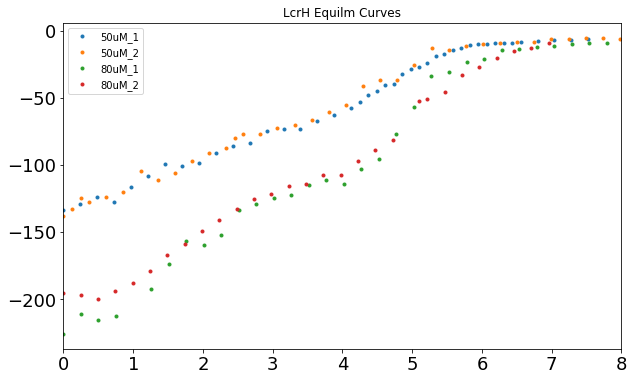

In [4]:
# the following commands plot all the data curves on one plot

plt.figure(figsize=(10,6))    
for c in proteins:          
    plt.plot(c.x, c.y, '.')

# the following commands plot all the data curves on one plot, where "loc" command determines where the legend goes.  
plt.legend([c.ID for c in proteins], loc='best')
plt.title("LcrH Equilm Curves")
plt.xlim([0, 8])                                              # x axis from 0 to 8
plt.show()



In [5]:
# Command imports pyfolding models
from pyfolding.models import *

# command lists models
list_models()

# After the model name:
#'Verified: True' signifies that we have tested the model and it functions as expected.
#'Verified:False' signifies that the model has not been tested.
    

[('CurvedChevronPolynomialFit', 'Verified: True'),
 ('HeteropolymerIsingEquilibrium', 'Verified: False'),
 ('HomozipperIsingEquilibrium', 'Verified: True'),
 ('ParallelTwoStateChevron', 'Verified: False'),
 ('ParallelTwoStateUnfoldingChevron', 'Verified: False'),
 ('TemplateModel', 'Verified: False'),
 ('ThreeStateChevron', 'Verified: True'),
 ('ThreeStateDimericIEquilibrium', 'Verified: True'),
 ('ThreeStateEquilibrium', 'Verified: True'),
 ('ThreeStateFastPhaseChevron', 'Verified: True'),
 ('ThreeStateMonoIEquilibrium', 'Verified: True'),
 ('ThreeStateSequentialChevron', 'Verified: True'),
 ('TwoStateChevron', 'Verified: True'),
 ('TwoStateChevronMovingTransition', 'Verified: True'),
 ('TwoStateDimerEquilibrium', 'Verified: True'),
 ('TwoStateEquilibrium', 'Verified: True'),
 ('TwoStateEquilibriumSloping', 'Verified: True')]

In [6]:
# We are going to fit this data to 3 state denaturation that unfolds via a dimeric intermediate (as per the J.B.C. paper)
# Lets print the equation & Info

models.ThreeStateDimericIEquilibrium().info()

<IPython.core.display.Math object>

 Three State model for a dimer denaturation Equilibrium - Dimeric Intermediate.

	Folding Scheme:
		N2 <-> 2I <-> 2D

	Params:
		Y_rel = spectroscopic signal at a given concentration of urea
		Y_N = spectroscopic signal for native state
		Y_D = spectroscopic signal for denatured state
		Y_I = spectroscopic signal for intermediate state
		F_D = fraction denatured monomers
		F_N = fraction native dimers
		F_I = fraction intermediate dimers
		Pt = total protein concentration. This variable needs to be set per denaturation curve.
		K1 = equilibrium contstant of unfolding native to intermediate state
		K2 = equilibrium contstant of unfolding intermediate to denatured state
		DG1 = stability of native state relative to intermediate state
		m1 = m-value of native to intermediate transition
		DG2 = stability of intermediate state relative to denatured state
		m2 = m-value of intermediate to denatured transition
		x = denaturant concentration (M)
		R = Universal Gas Constant (kcal.mol-1.K-1)
		

### Automatic global fitting to the homozipper model

We will try to fit this with the homozipper model to get the parameters

In [7]:
global_fit = core.GlobalFit()
global_fit.fit_funcs = [models.ThreeStateDimericIEquilibrium for i in xrange(len(proteins))]
global_fit.constants = [(('Pt',c),) for c in Pt]
global_fit.shared = ['DG1','DG2','m1','m2'] #
global_fit.x = [p.x for p in proteins]
global_fit.y = [p.y for p in proteins]
global_fit.ID = [p.ID for p in proteins]

global_fit.initialise()

In [8]:
print global_fit.params.keys(), len(global_fit.params.keys())

['DG2', 'DG1', 'm1', 'm2', 'Y_N_{50uM_1}', 'Y_I_{50uM_1}', 'Y_D_{50uM_1}', 'Y_N_{50uM_2}', 'Y_I_{50uM_2}', 'Y_D_{50uM_2}', 'Y_N_{80uM_1}', 'Y_I_{80uM_1}', 'Y_D_{80uM_1}', 'Y_N_{80uM_2}', 'Y_I_{80uM_2}', 'Y_D_{80uM_2}'] 16


In [9]:
p0 = [5.,1.7,1.,1.7,-200,-50,-10,-200,-50,-10,-200,-50,-10,-200,-100,-10]
b = bounds=((0.,0.,-3.,-3.,-300,-300,-300,-300,-300,-300,-300,-300,-300,-300,-300,-300),
            (20.,20.,3.,3.,0,0,0,0,0,0,0,0,0,0,0,0))
# print len(b[0]), len(b[1]), len(p0)
out, covar = global_fit.fit( p0=p0, bounds=b )

# print out the results of the fit
for result in global_fit.results:
    result.display()

Fitting results
ID: 50uM_1
Model: ThreeStateDimericIEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(s) DG1    1.66960 ± 0.72748    	 95% CI[   1.48547,    1.85373]
(s) m1     1.07179 ± 0.44713    	 95% CI[   0.95862,    1.18496]
(s) DG2    5.72601 ± 2.41011    	 95% CI[   5.11598,    6.33604]
(s) m2     1.71689 ± 0.45271    	 95% CI[   1.60230,    1.83147]
(f) Y_N -133.91557 ± 10.10666   	 95% CI[-136.47369, -131.35746]
(f) Y_I  -75.49237 ± 11.70925   	 95% CI[ -78.45612,  -72.52863]
(f) Y_D   -6.57644 ± 3.97870    	 95% CI[  -7.58350,   -5.56938]
(c) Pt    50.00000
--------------------------------------------------------------------------------
R^2: 0.99661


Fitting results
ID: 50uM_2
Model: ThreeStateDimericIEquilibrium
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(s) DG1    1.66960 ± 0.72748    	 95% CI[   1.48547,    1.85373]
(s) m1     1.07179 ± 0.44713    	 95% CI[   0.95862,    1.18496]
(s) DG2 

---

### End of this Notebook.

---

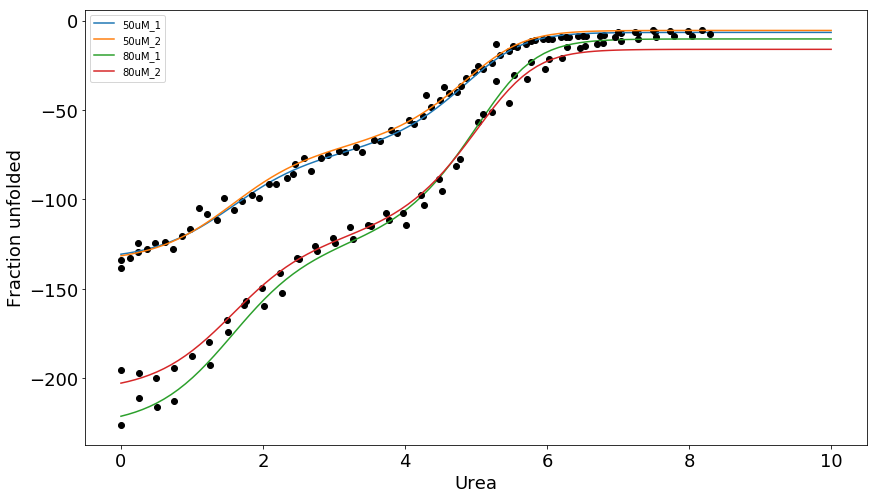

In [10]:
results = global_fit.results
plt.figure(figsize=(14,8))
for i, p in enumerate(proteins):
    plt.plot(p.x, p.y, 'ko')
    plt.plot(results[i].x_fit, results[i].y_fit, '-', label=p.ID)
plt.legend()
plt.xlabel(p.denaturant_label, fontsize=constants.FONT_SIZE)
plt.ylabel('Fraction unfolded', fontsize=constants.FONT_SIZE)
plt.show()

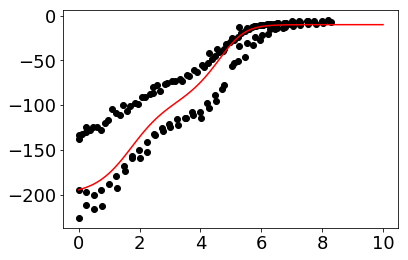

-194.58090216


In [11]:
## TRY SIMULATING IT WITH BEST FIT VALUES....

DG1 = 1.7
DG2 = 5.
m1 = 1.
m2 = 1.7
Y_N = -200
Y_I = -100
Y_D = -10
Pt = 80

x = np.linspace(0.,10.,100)
m = models.ThreeStateDimericIEquilibrium()
y = m(x, DG1, m1, DG2, m2, Y_N, Y_I, Y_D, Pt)

plt.figure()
for i, p in enumerate(proteins):
    plt.plot(p.x, p.y, 'ko')
plt.plot(x,y,'r-')
# plt.ylim([-200,100])
plt.show()
print y[0]